### Nama: Raditya Sebastian
### NIM: 1306620042
### Kelas: Fisika A 2020

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

### Persamaan yang digunakan untuk menyelesaikan No 1

$x_1,x_2 = input = 1,2$<br>
$weightnya = w_{ij} =0.2$<br>
$biasnya = x_0 = a_0 = 1$<br>
seperti dendrit inputnya dimasukan ke neron(layer) sehingga menghasilkan rumus berikut:<br>
$h_1(x) =wx_1+wx_2+x_0$ <br>
$h_2(x) =wx_1+wx_2+x_0$ <br>
$h_3(x) =wx_1+wx_2+x_0$ <br>
dimana ${h_1,h_2,h_3}$ adalah hidden layer.<br>
selanjutnya masukan hasil dari tiga hidden layer itu kedalam aktifasi fungsi dan aktifasi fungsi yang digunakan untuk ini adalah RELU.<br>
$f(x)=maximum(0,x)$<br>
jadi,<br>
$f_1(x)=maximum(0,h_1(x))$<br>
$f_2(x)=maximum(0,h_2(x))$<br>
$f_3(x)=maximum(0,h_3(x))$<br>
dan terakhir hasil itu semua digabung untuk mendapatkan y<br>
$y =f_1(x)w+f_2(x)w+f_3(x)w+a_0$

In [99]:
inputs = [1.0,2.0]
weights = [[0.2,0.2],[0.2,0.2],[0.2,0.2]]

bias = [1.0,1.0,1.0]
#bias1 = 1.0
#bias2 = 1.0
#bias3 = 1.0
output = np.dot(weights,inputs)+bias
#layer 1
print(output)

[1.6 1.6 1.6]


selanjutnya saya menggunakan RELU sebagai fungsi aktifasi. RELU secara singkat adalah sebuah fungsi yang memulai linearitas pada 0 sehingga tidak menyetuh wilayah negatif. tujuan ini itu untuk menghilangkan vansihing gradient.<br>
vanishing gradient adalah sebuah kejadian dimana sebuah aktifasi fungsi bingung dalam mengkategorisasikan kelas ini terjadi karena:<br>
<ol>data satu dengan yang lain overlap</ol>
<ol>nilai data membuat susah model mengkategorisasikan kelas data tersebut</ol>

In [100]:
def RELU(x):
    return np.maximum(0, x)

In [101]:
#layer 2
new_output = RELU(output)
new_output

array([1.6, 1.6, 1.6])

In [102]:

y_pred_weight = 0.2
y_pred = new_output[0]*y_pred_weight+ new_output[1]*y_pred_weight + new_output[2]*y_pred_weight + bias[0]
print((y_pred))

1.9600000000000002


## NO. 2

Gambar Artificial Neural Networknya sebagai berikut:

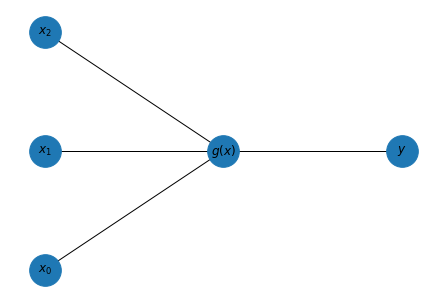

In [103]:
#np.random.seed(0)
G = nx.Graph()
G.add_node('$x_0$')
G.add_node('$x_1$')
G.add_node('$x_2$')

G.add_node('$g(x)$')

G.add_node('$y$')

G.add_edge('$x_0$','$g(x)$')
G.add_edge('$x_1$','$g(x)$')
G.add_edge('$x_2$','$g(x)$')


G.add_edge('$g(x)$','$y$')

pos={
    '$x_0$':(1,1),
    '$x_1$':(1,2),
    '$x_2$':(1,3),
    '$g(x)$':(2,2),
    '$y$':(3,2)
}
nx.draw(G,pos,with_labels=True,node_size=1000)
plt.show()

selanjutnya saya membuat neural network secara basic

In [104]:
x_1 = [0.0,0.0,1.0,1.0]
x_2=[0.0,1.0,0.0,1.0]
y =[0,0,0,1]
x =[[0.0,0.0],
    [0.1,1.0],
    [1.0,0.0],
    [1.0,1.0]]


In [105]:
x_1_array = np.array(x_1)
x_2_array = np.array(x_2)
x_1_array[0]

0.0

In [106]:
outputs =[]
for i in range(len(x_1)):
    xone = x_1_array[i]
    xtwo = x_2_array[i]
    output = xone*0.5 + xtwo*0.5+1
    outputs.append(output)
outputs

[1.0, 1.5, 1.5, 2.0]

hasil di atas adalah hasil total input yang digabung dan dihitung seperti no 1 yang dimasukan pada layer g(x) yang akan dilakukan fungsi aktivasi sigmoid

In [107]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [108]:
new_outputs =[]
for i in range(len(outputs)):   
    new_output=sigmoid(outputs[i])
    print(new_output)
    if new_output > 0.5:
        new_output = 1
        new_outputs.append(new_output)
    else:
        new_output = 0
        new_outputs.append(new_output)
new_outputs

0.7310585786300049
0.8175744761936437
0.8175744761936437
0.8807970779778823


[1, 1, 1, 1]

selanjutnya menglihat hasil akurasi dan errornya menggunakan MSE

In [109]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
            return correct / float(len(actual)) * 100.0

In [110]:
accuracy = accuracy_metric(y, new_outputs)
print(f'{accuracy}%')

25.0%


In [111]:
def mean_squared_error(actual, predicted):
    sum_square_error = 0.0
    for i in range(len(actual)):
        sum_square_error += (actual[i] - predicted[i])**2.0
        mean_square_error = 1.0 / len(actual) * sum_square_error
    return mean_square_error

In [112]:
MSE = mean_squared_error(y,new_outputs)
MSE

0.75

dari di atas nilai MSE nya sangat tinggi sehingga untuk menguranginya perlu menerapkan Gradient Descent algoritma. algoritma ini saya terapkan dengan secara manual tanpa library

In [113]:
w_loss = []
for i in range(len(new_outputs)):
    loss = np.mean((y[i]-new_outputs[i])**2)
    w_loss.append(loss)


In [114]:

bias = 1
learning_rate = 2
nb_of_iterations = 1  

In [115]:
#t = target
#y = prediksi
def loss(y, t):
    """MSE loss function"""
    return np.mean((t - y)**2)
def gradient(y, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (y - t)

def delta_w(y, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(y, x, t))

In [116]:
X = np.array(x).reshape(-1,1)
w = 0.5
w_loss = [(w, loss(np.array(new_outputs), np.array(y)))]
w_loss

[(0.5, 0.75)]

In [117]:
for i in range(nb_of_iterations):
    dw = delta_w(new_outputs,X,np.array(y),learning_rate)  # Delta w update
    w = w - dw  # Update the current weight parameter



In [118]:
w_loss

[(0.5, 0.75)]

In [119]:
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.5000 	 loss: 0.7500


In [120]:
outputs =[]
for i in range(len(x_1)):
    xone = x_1_array[i]
    xtwo = x_2_array[i]
    output = xone*w + xtwo*w+1
    outputs.append(output)
outputs

[1.0, -0.03750000000000009, -0.03750000000000009, -1.0750000000000002]

In [121]:
new_outputs =[]
for i in range(len(outputs)):   
    new_output=sigmoid(outputs[i])
    if new_output > 0.5:
        new_output = 1
        new_outputs.append(new_output)
    else:
        new_output = 0
        new_outputs.append(new_output)
new_outputs

[1, 0, 0, 0]

In [122]:
w_loss.append((w,loss(np.array(new_outputs), np.array(y))))

dari sini kita bisa melihat penurunan error nya setelah di update bobotnya.

dan yang terakhir saya menerapkan parameter W= [-30,20,20] secara bersatu -satu

In [123]:
outputs =[]
for i in range(len(x_1)):
    xone = x_1_array[i]
    xtwo = x_2_array[i]
    output = xone* -30  + xtwo*30+1 
    outputs.append(output)
outputs

[1.0, 31.0, -29.0, 1.0]

In [124]:
y_pred =[]
for i in range(len(outputs)):   
    new_output=sigmoid(outputs[i])
    if new_output > 0.5:
        new_output = 1
        y_pred.append(new_output)
    else:
        new_output = 0
        y_pred.append(new_output)
y_pred

[1, 1, 0, 1]

In [125]:
accuracy = accuracy_metric(y, y_pred)
print(f'{accuracy}%')

25.0%


In [126]:
MSE = mean_squared_error(y,y_pred)
MSE

0.5

In [127]:
outputs =[]
for i in range(len(x_1)):
    xone = x_1_array[i]
    xtwo = x_2_array[i]
    output = xone*20 + xtwo*20+1
    outputs.append(output)
outputs

[1.0, 21.0, 21.0, 41.0]

In [128]:
y_pred =[]
for i in range(len(outputs)):   
    new_output=sigmoid(outputs[i])
    if new_output > 0.5:
        new_output = 1
        y_pred.append(new_output)
    else:
        new_output = 0
        y_pred.append(new_output)
y_pred

[1, 1, 1, 1]

In [129]:
accuracy = accuracy_metric(y, y_pred)
print(f'{accuracy}%')

25.0%


In [130]:
MSE = mean_squared_error(y,y_pred)
MSE

0.75

dari hasil ini yang errorny a paling dikit dan mendekati dengan tepat adalah -30 ini dikarenakan ada tombol - yang membuat hasil perhitungan saat menginput layer lebih unik jadi pada saat dimasukan kedalam fungsi aktifasi klasifikasi akan memprediksi lebih baik